## Descargamos Librerias

In [1]:
import pandas as pd 
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Descargamos Base de Datos

In [2]:
df = pd.read_csv("./dataset_SCL.csv")

C:\Users\TDC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Verificamos los tipos de datos y los nulos 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


#### Vemos que no hay missing values y que las fechas desquegue iniciales y fehas de despeque operativas no tienen el  Dtype correcto, pero lo modificaremos mas adelante

In [4]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


#### Limpiamos la Base y dejamos Columnas que no duplican la informacion

In [5]:
data= df[['Fecha-I','Fecha-O','DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLADES']]

## Realizamos exploracion de la distribucion de la Data

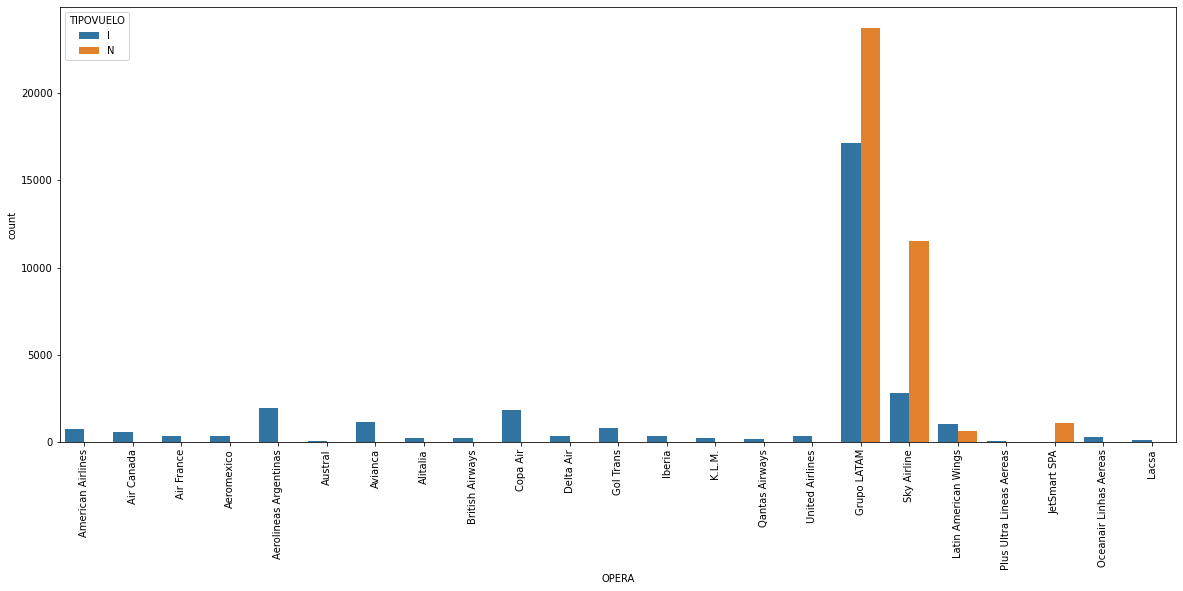

In [6]:
plt.figure(figsize=(20,8))
sns.countplot(x='OPERA', hue= "TIPOVUELO",data=data )
plt.xticks(rotation=90)
plt.show()

#### Claramente existe una distribucion dispar en el numero de vuelos realizados por aerolineas ya sea en vuelos internacionales como nacionales

<AxesSubplot:ylabel='OPERA'>

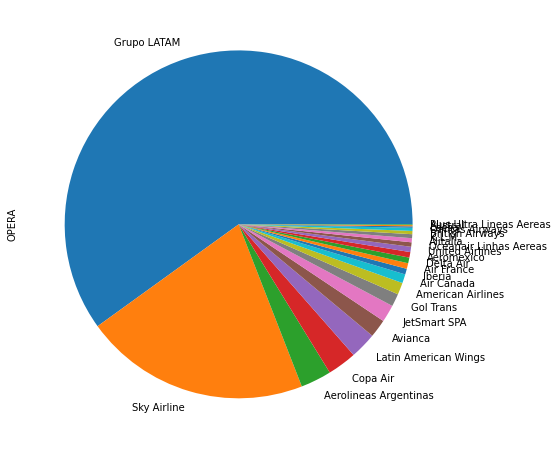

In [7]:
vuelos_aerolineas=data['OPERA'].value_counts()
plt.figure(figsize=(20,8))
vuelos_aerolineas.plot(kind='pie')

#### Comprobamos que alrededor de un 80% de los vuelos es operado por solo 2 aerolineas

<AxesSubplot:xlabel='DIANOM', ylabel='count'>

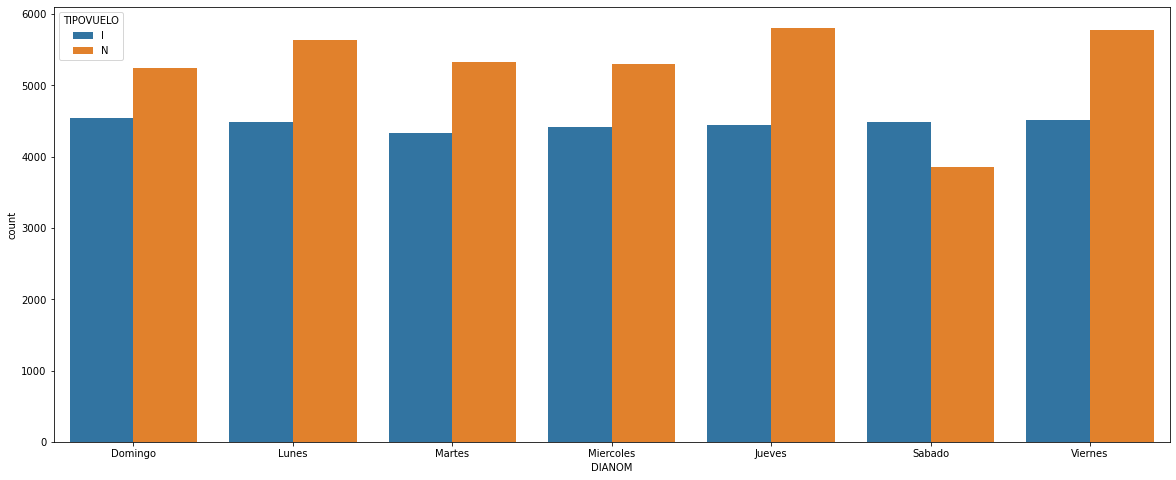

In [8]:
plt.figure(figsize=(20,8))
sns.countplot(x='DIANOM', hue= "TIPOVUELO",data=data )

#### Aparentemente la cantidad de vuelos internacionales no varia segun el dia, a diferencia de los vuelos nacionales, donde el sabado baja la cantidad notoriamente

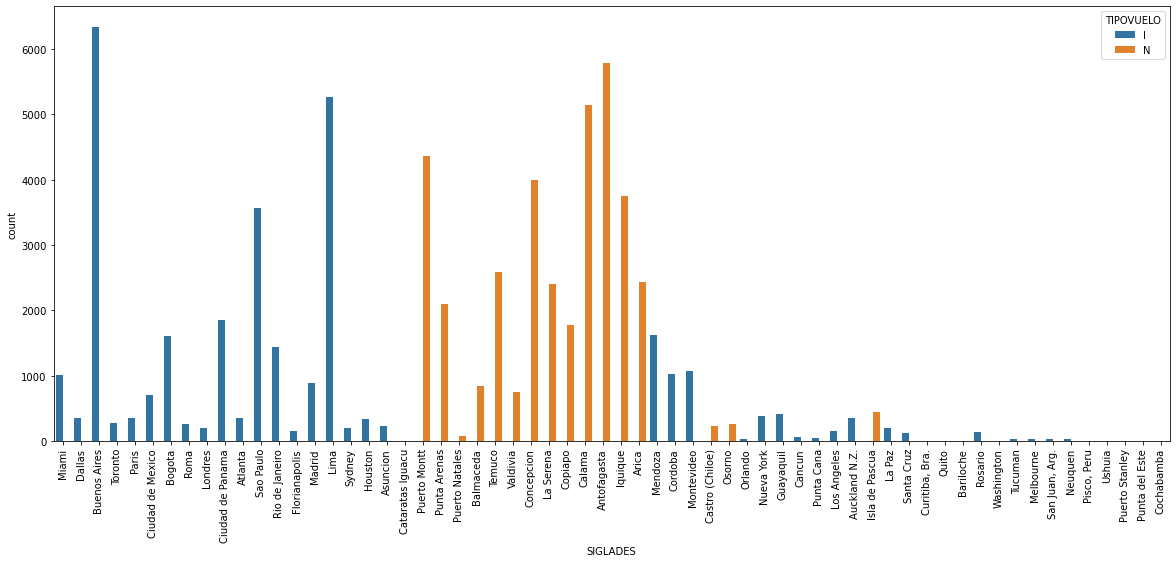

In [9]:
plt.figure(figsize=(20,8))
sns.countplot(x='SIGLADES', hue= "TIPOVUELO",data=data )
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='SIGLADES'>

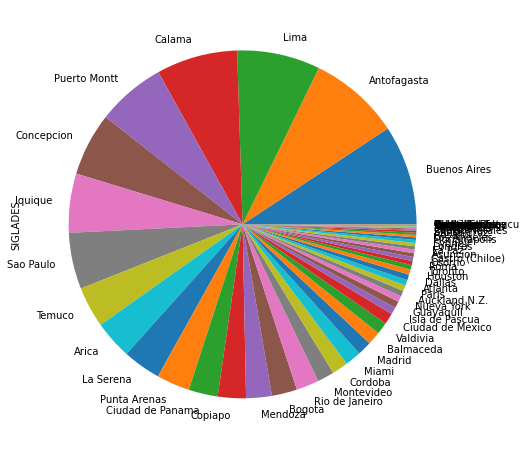

In [10]:
aeropuertos_llegadas=data['SIGLADES'].value_counts()
plt.figure(figsize=(20,8))
aeropuertos_llegadas.plot(kind='pie')

#### Casi la totalidad de los vuelos se dirigen a aeropuertos dentro de America del Sur




## Generacion de Columnas adicionales
* Temporada Alta
* Diferencia entre vuelo programado y vuelo operado
* Dummy si el atraso fue mayor a 15 minutos
* Periodo del dia en que el vuelo fue programado

In [11]:
data["Fecha-O"]=pd.to_datetime(data["Fecha-O"])
data["Fecha-I"]=pd.to_datetime(data["Fecha-I"])

<ipython-input-11-b4e5d550426f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Fecha-O"]=pd.to_datetime(data["Fecha-O"])
<ipython-input-11-b4e5d550426f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Fecha-I"]=pd.to_datetime(data["Fecha-I"])


In [12]:
def high_season(serie):
    fecha_i=serie.loc["Fecha-I"]
    year=fecha_i.year
    month=fecha_i.month
    day=fecha_i.day
 
    fecha_i=datetime(year,month,day) 
    if (fecha_i>= datetime(year,12,15) and fecha_i<=datetime(year,12,31)) or (fecha_i>= datetime(year,1, 1) and fecha_i<=datetime(year,3,3)) or (fecha_i>= datetime(year,7, 15) and fecha_i<=datetime(year,7,31)) or (fecha_i>= datetime(year,9,11) and fecha_i<=datetime(year,9,30)) :
        return 1
    return 0

data["temporada_alta"]=data.apply(high_season,axis=1,result_type='expand')
data.head()

<ipython-input-12-d7e42a7cfaf3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["temporada_alta"]=data.apply(high_season,axis=1,result_type='expand')


,Fecha-I,Fecha-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,temporada_alta
0,2017-01-01 23:30:00,2017-01-01 23:33:00,1,1,2017,Domingo,I,American Airlines,Miami,1
1,2017-01-02 23:30:00,2017-01-02 23:39:00,2,1,2017,Lunes,I,American Airlines,Miami,1
2,2017-01-03 23:30:00,2017-01-03 23:39:00,3,1,2017,Martes,I,American Airlines,Miami,1
3,2017-01-04 23:30:00,2017-01-04 23:33:00,4,1,2017,Miercoles,I,American Airlines,Miami,1
4,2017-01-05 23:30:00,2017-01-05 23:28:00,5,1,2017,Jueves,I,American Airlines,Miami,1


In [13]:
data["Min_dif"]=(data["Fecha-O"]-data["Fecha-I"]) /np.timedelta64(1,"m")
data["atraso_15"]=(abs(data["Min_dif"])>15  )+0 


df.head()

<ipython-input-13-df8d887cfa6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Min_dif"]=(data["Fecha-O"]-data["Fecha-I"]) /np.timedelta64(1,"m")
<ipython-input-13-df8d887cfa6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["atraso_15"]=(abs(data["Min_dif"])>15  )+0


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [14]:
def periodo(serie):
    fecha_i=serie.loc["Fecha-I"]
    hour=fecha_i.hour
    if  hour>=5 and hour<=11:
        return 'Mañana'
    elif  hour>=12 and hour<=18:
        return 'Tarde'
    elif  hour>= 19 and hour<=23 or hour>= 0 and hour<=4  :
        return 'Noche'

data["periodo_dia"]=data.apply(periodo,axis=1,result_type='expand')
data.head()

<ipython-input-14-ec2a145bfbb3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["periodo_dia"]=data.apply(periodo,axis=1,result_type='expand')


,Fecha-I,Fecha-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,temporada_alta,Min_dif,atraso_15,periodo_dia
0,2017-01-01 23:30:00,2017-01-01 23:33:00,1,1,2017,Domingo,I,American Airlines,Miami,1,3.0,0,Noche
1,2017-01-02 23:30:00,2017-01-02 23:39:00,2,1,2017,Lunes,I,American Airlines,Miami,1,9.0,0,Noche
2,2017-01-03 23:30:00,2017-01-03 23:39:00,3,1,2017,Martes,I,American Airlines,Miami,1,9.0,0,Noche
3,2017-01-04 23:30:00,2017-01-04 23:33:00,4,1,2017,Miercoles,I,American Airlines,Miami,1,3.0,0,Noche
4,2017-01-05 23:30:00,2017-01-05 23:28:00,5,1,2017,Jueves,I,American Airlines,Miami,1,-2.0,0,Noche


## Exportacion de la data

In [15]:
data.to_csv("synthetic_features.csv")

## Exploracion datos utilizando la informacion de las nuevas Columnas

In [16]:
data['Min_dif'].describe()

count    68206.000000
mean         9.110855
std         19.313387
min        -14.000000
25%         -1.000000
50%          4.000000
75%         12.000000
max        161.000000
Name: Min_dif, dtype: float64

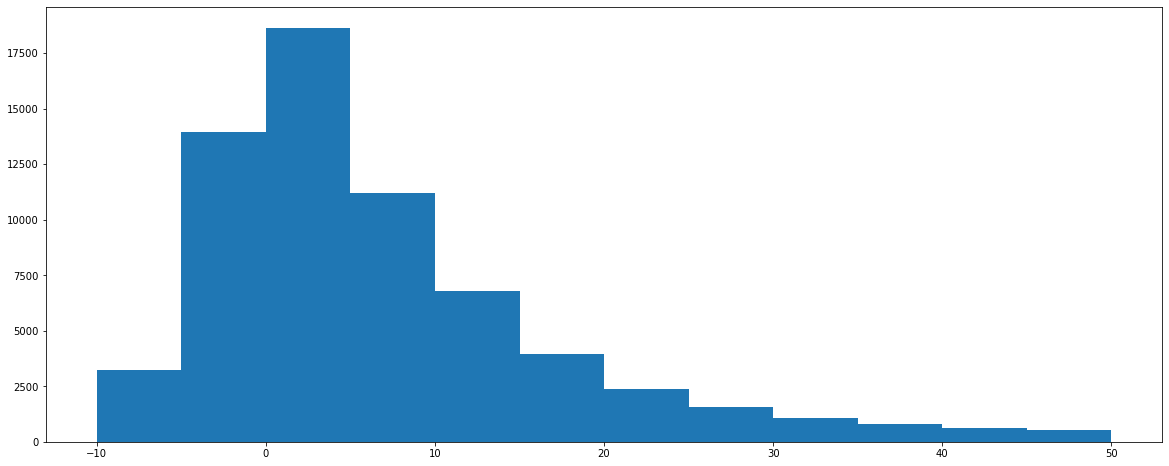

In [17]:
plt.figure(figsize=(20,8))
bins= [-10,-5,0,5,10,15,20,25,30,35,40,45,50]
plt.hist(data['Min_dif'], bins)
plt.show()

#### Podemos concluir que la variable Min_dif tiene una distribucion positive skew, es decir todos los datos se agrupan a lado izquierda del rango, por lo tanto concluimos que los retrasos ( mayores a 15 minutos) no son mas del 25% de la muestra ( y de hecho son menos debido que el percentil 75 es de 12 minutos)

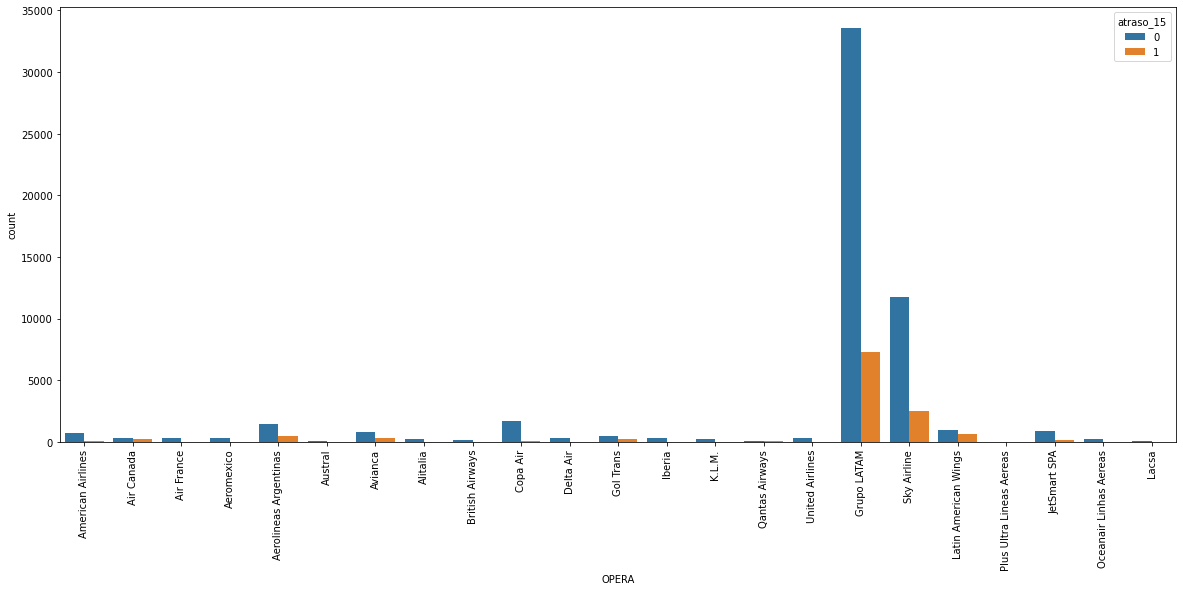

In [18]:
plt.figure(figsize=(20,8))
sns.countplot(x='OPERA', hue= "atraso_15",data=data )
plt.xticks(rotation=90)
plt.show()

Se aprecia que al igual que las aerolineas que tienen  mas vuelos , tienen mas retrasos tambien hablando en niveles

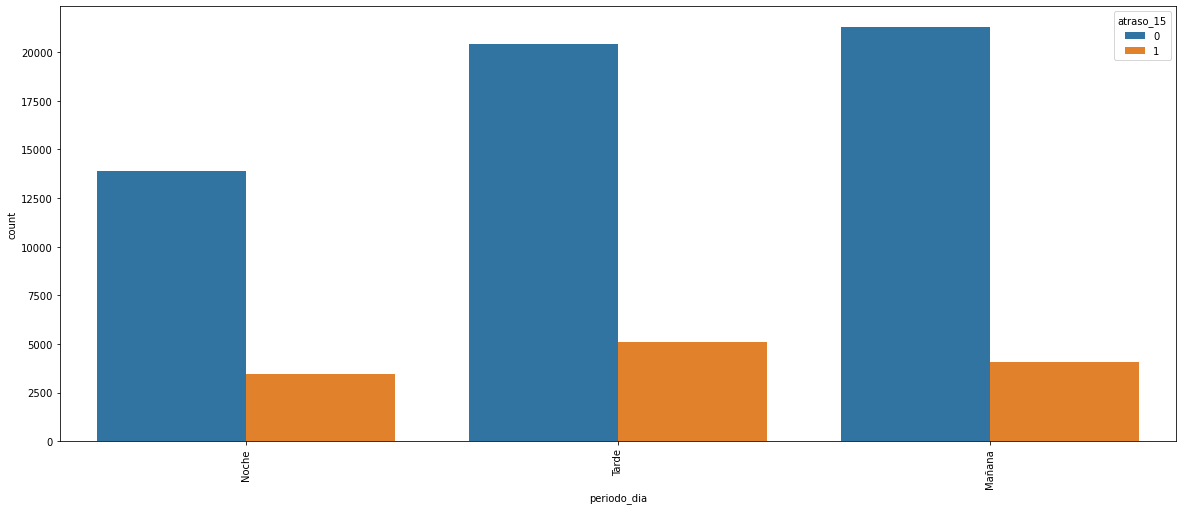

In [19]:
plt.figure(figsize=(20,8))
sns.countplot(x='periodo_dia', hue= "atraso_15",data=data )
plt.xticks(rotation=90)
plt.show()

#### no existe relevancia alguna a la hora en que esta programado el vuelo

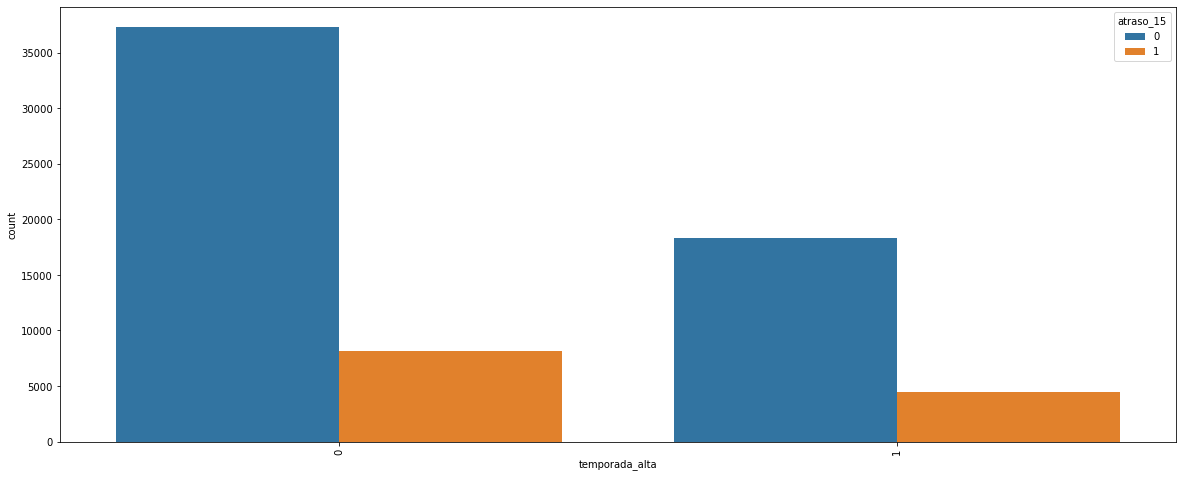

In [20]:
plt.figure(figsize=(20,8))
sns.countplot(x='temporada_alta', hue= "atraso_15",data=data )
plt.xticks(rotation=90)
plt.show()

#### Al igual que en el grafico anterior, no se dislumbra que los retrasos sean productos o no de la temporada alta


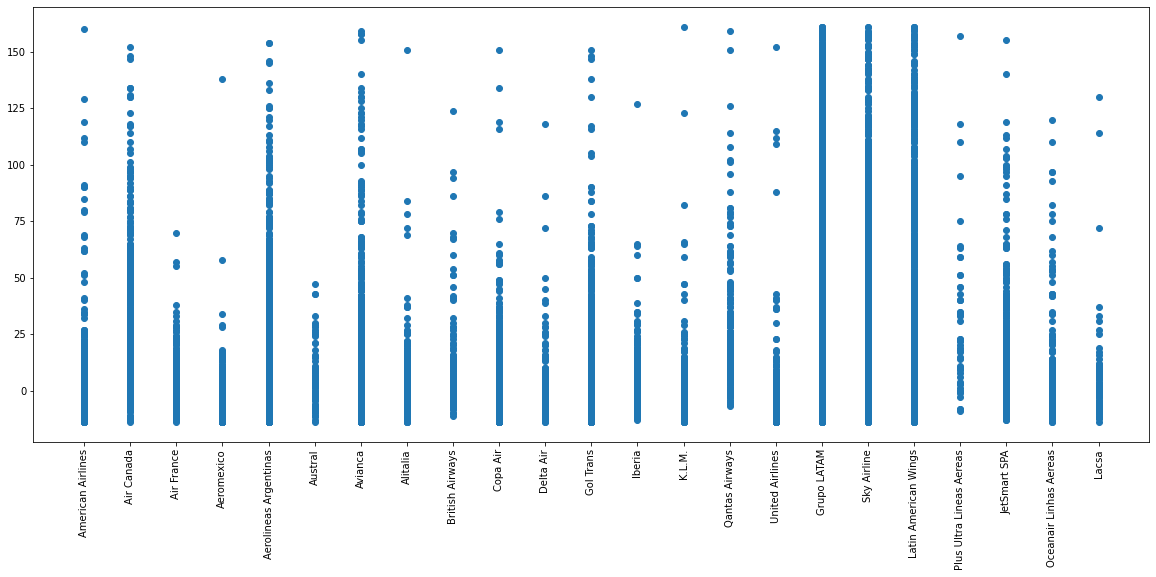

In [21]:
plt.figure(figsize=(20,8))
plt.scatter(data['OPERA'], data['Min_dif'])
plt.xticks(rotation=90)
plt.show()

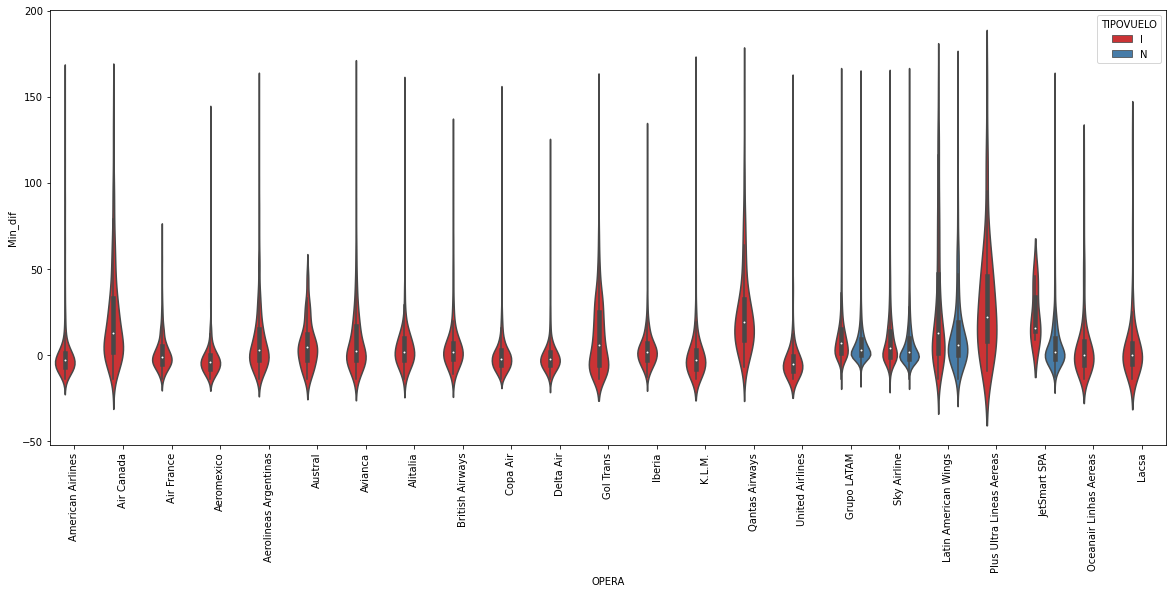

In [22]:
plt.figure(figsize=(20,8))
sns.violinplot(x="OPERA", y="Min_dif", data=data,hue='TIPOVUELO',palette='Set1')
plt.xticks(rotation=90)
plt.show()

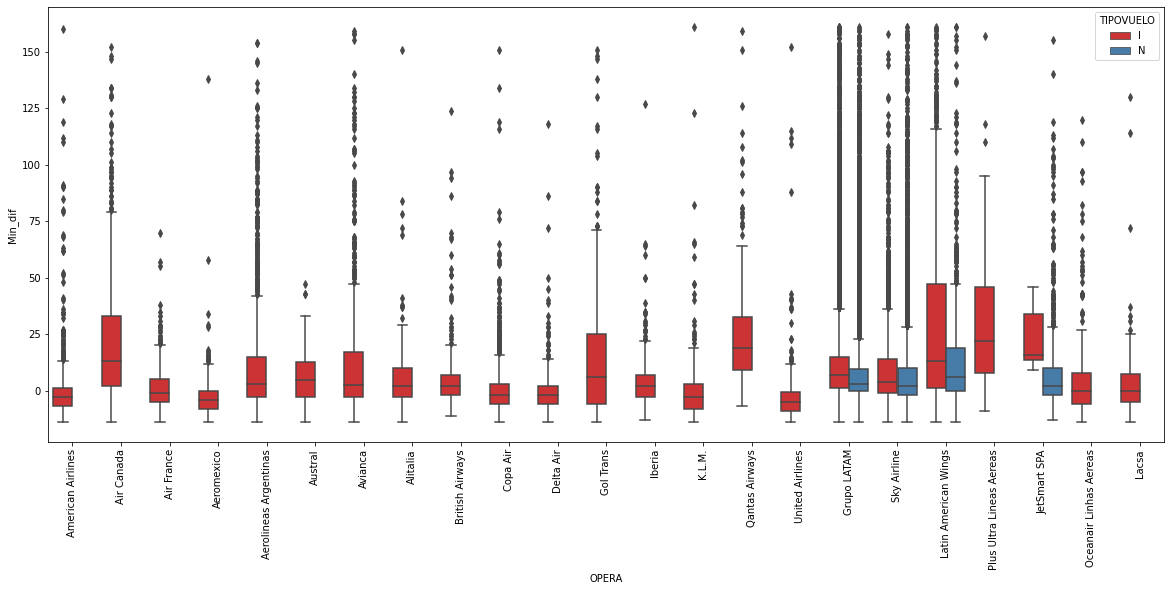

In [23]:
plt.figure(figsize=(20,8))
sns.boxplot(x="OPERA", y="Min_dif", data=data,hue='TIPOVUELO',palette='Set1')
plt.xticks(rotation=90)
plt.show()

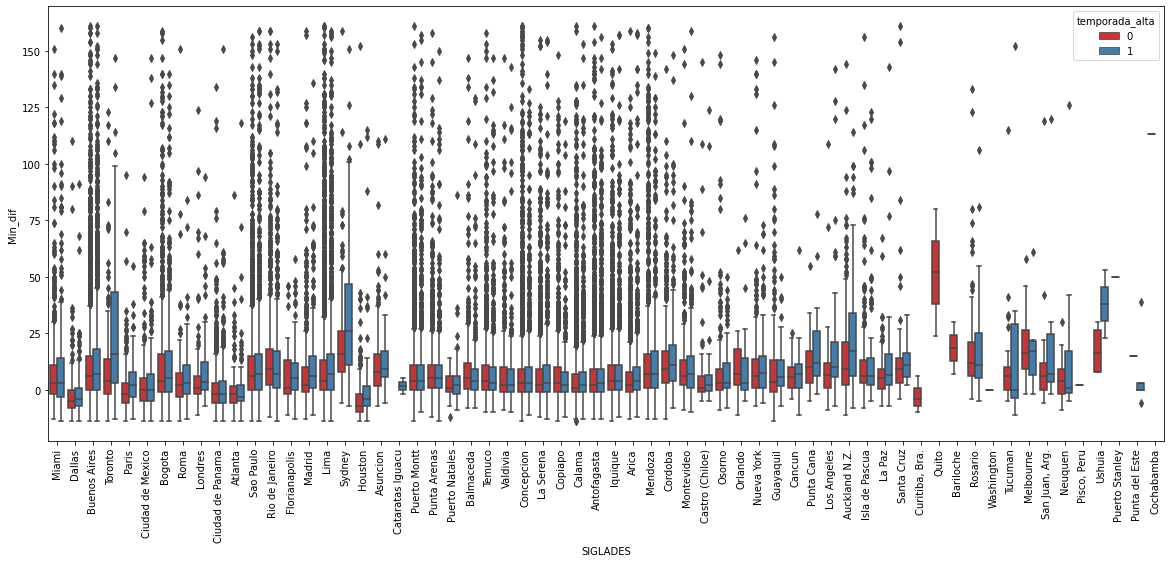

In [24]:
plt.figure(figsize=(20,8))
sns.boxplot(x="SIGLADES", y="Min_dif", data=data,hue='temporada_alta',palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [25]:
df_1= data.loc[data['SIGLADES'].eq('Quito')]
df_1.head()

,Fecha-I,Fecha-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,temporada_alta,Min_dif,atraso_15,periodo_dia
17061,2017-03-23 01:00:00,2017-03-23 01:24:00,23,3,2017,Jueves,I,Grupo LATAM,Quito,0,24.0,1,Noche
55144,2017-10-06 00:55:00,2017-10-06 02:15:00,6,10,2017,Viernes,I,Grupo LATAM,Quito,0,80.0,1,Noche


In [26]:
df_2=data.loc[data['OPERA'].eq('Grupo LATAM')]
df_2.head()

,Fecha-I,Fecha-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,temporada_alta,Min_dif,atraso_15,periodo_dia
895,2017-01-03 13:50:00,2017-01-03 14:05:00,3,1,2017,Martes,I,Grupo LATAM,Asuncion,1,15.0,0,Tarde
896,2017-01-04 13:50:00,2017-01-04 13:55:00,4,1,2017,Miercoles,I,Grupo LATAM,Asuncion,1,5.0,0,Tarde
897,2017-01-10 13:50:00,2017-01-10 13:59:00,10,1,2017,Martes,I,Grupo LATAM,Asuncion,1,9.0,0,Tarde
898,2017-01-11 13:50:00,2017-01-11 13:58:00,11,1,2017,Miercoles,I,Grupo LATAM,Asuncion,1,8.0,0,Tarde
899,2017-01-12 13:50:00,2017-01-12 14:23:00,12,1,2017,Jueves,I,Grupo LATAM,Asuncion,1,33.0,1,Tarde


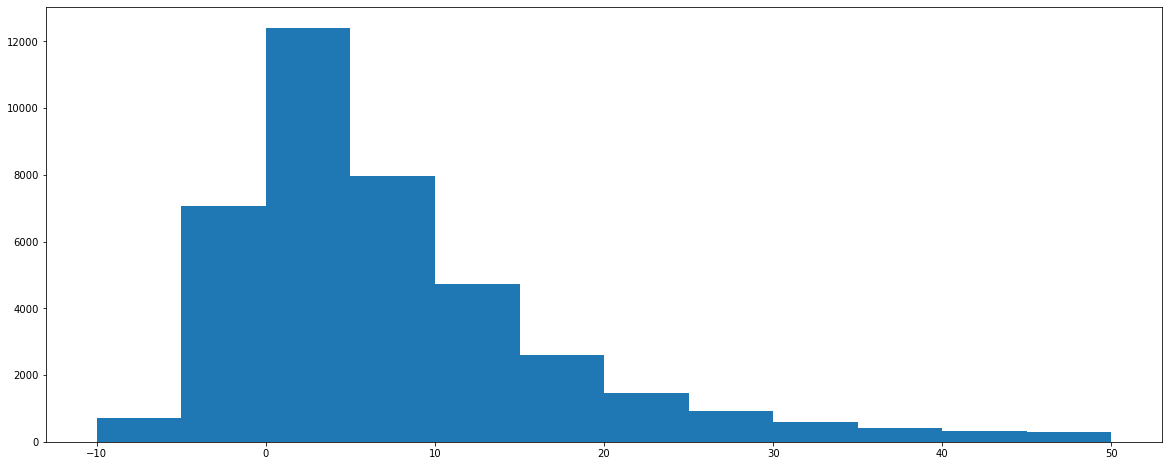

In [27]:
plt.figure(figsize=(20,8))
bins= [-10,-5,0,5,10,15,20,25,30,35,40,45,50]
plt.hist(df_2['Min_dif'], bins)
plt.show()

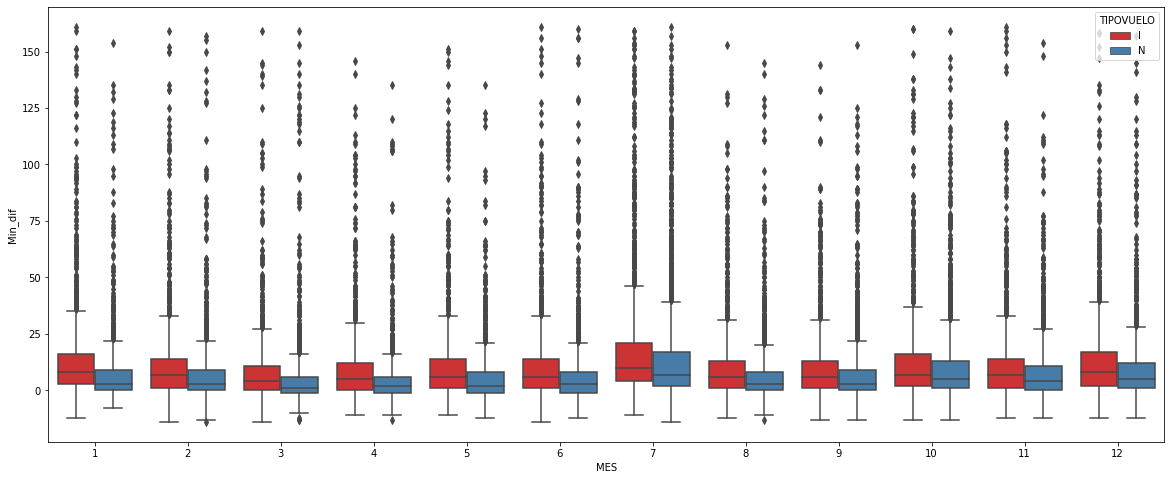

In [28]:
plt.figure(figsize=(20,8))
sns.boxplot(x="MES", y="Min_dif", data=df_2,hue='TIPOVUELO',palette='Set1')

plt.show()

#### LA data de LAn se comporta de manera similar a todo la base, Claramente esto es porque los vuelos de Lan son alrededor de la mitad de la base

## Tasas de atraso por Destino, Aereolinea, Mes, Dia de la Semana...

In [29]:
data.groupby(['OPERA']).mean()['atraso_15'].sort_values(ascending=False)


OPERA
Plus Ultra Lineas Aereas    0.612245
Qantas Airways              0.579487
Air Canada                  0.456637
Latin American Wings        0.406810
Gol Trans                   0.356079
Avianca                     0.265625
Aerolineas Argentinas       0.240123
Austral                     0.202703
JetSmart SPA                0.178995
Grupo LATAM                 0.178666
Sky Airline                 0.177647
Oceanair Linhas Aereas      0.154122
British Airways             0.141463
Lacsa                       0.119565
Alitalia                    0.111969
Iberia                      0.099448
Air France                  0.083799
K.L.M.                      0.083665
American Airlines           0.067371
Copa Air                    0.062703
Delta Air                   0.058659
United Airlines             0.050746
Aeromexico                  0.028490
Name: atraso_15, dtype: float64

In [30]:
data.groupby(['OPERA']).count()['atraso_15'].sort_values(ascending=True)

OPERA
Plus Ultra Lineas Aereas       49
Austral                        74
Lacsa                          92
Qantas Airways                195
British Airways               205
K.L.M.                        251
Alitalia                      259
Oceanair Linhas Aereas        279
United Airlines               335
Aeromexico                    351
Air France                    358
Delta Air                     358
Iberia                        362
Air Canada                    565
American Airlines             757
Gol Trans                     806
JetSmart SPA                 1095
Avianca                      1152
Latin American Wings         1674
Copa Air                     1850
Aerolineas Argentinas        1949
Sky Airline                 14298
Grupo LATAM                 40892
Name: atraso_15, dtype: int64

In [31]:
data.groupby(['MES']).mean()['atraso_15'].sort_values(ascending=False)


MES
7     0.293391
12    0.254091
10    0.225962
11    0.197204
8     0.173398
9     0.172371
6     0.171050
1     0.160118
5     0.157824
2     0.151591
4     0.116534
3     0.115104
Name: atraso_15, dtype: float64

In [32]:
data.groupby(['DIANOM']).mean()['atraso_15'].sort_values(ascending=False)


DIANOM
Viernes      0.222017
Lunes        0.202152
Jueves       0.199493
Miercoles    0.170850
Martes       0.169116
Sabado       0.163194
Domingo      0.161086
Name: atraso_15, dtype: float64

In [33]:
data.groupby(['periodo_dia']).mean()['atraso_15'].sort_values(ascending=False)

periodo_dia
Noche     0.200023
Tarde     0.199404
Mañana    0.160066
Name: atraso_15, dtype: float64

In [34]:
data.groupby(['temporada_alta']).mean()['atraso_15'].sort_values(ascending=False)

temporada_alta
1    0.19638
0    0.17921
Name: atraso_15, dtype: float64

In [35]:
data.groupby(['TIPOVUELO']).mean()['atraso_15'].sort_values(ascending=False)

TIPOVUELO
I    0.225608
N    0.150571
Name: atraso_15, dtype: float64

In [36]:
data.groupby(['SIGLADES']).mean()['atraso_15'].sort_values(ascending=False)


SIGLADES
Puerto Stanley      1.000000
Quito               1.000000
Cochabamba          1.000000
Ushuia              0.666667
Sydney              0.582474
                      ...   
Houston             0.050898
Cataratas Iguacu    0.000000
Curitiba, Bra.      0.000000
Pisco, Peru         0.000000
Washington          0.000000
Name: atraso_15, Length: 62, dtype: float64

In [37]:
data.groupby(['SIGLADES']).count()['atraso_15'].sort_values()

SIGLADES
Washington             1
Cochabamba             1
Pisco, Peru            1
Puerto Stanley         1
Cataratas Iguacu       2
                    ... 
Puerto Montt        4357
Calama              5146
Lima                5270
Antofagasta         5786
Buenos Aires        6335
Name: atraso_15, Length: 62, dtype: int64

Viendo toda la data , y asumiendo que existen 2 posibilidades de que exista atraso ( por aerolinea o por los pasajeros)
la aerolinea por que pudiese tener alguna falla los aviones o porque viene con atraso desde donde proviene el avion. Y esa informacion no la poseemos, y puede transformarse en lo que en estadistica se llama variable cofounders, es decir que puede haber un motivo, el que no se tiene informacion que este produciendo los atrasos.
Por el lado de las personas, creo que el horario en queesta puesto el vuelo debiese de tener una mayor incidencia en los atrasos. Por ejemplo el trafico que hay en las mananas para desplasarse por santiago, otro seria en altas temporada, ya que hace que el aeropuerto este en produccion maxima, y ante cualquier desajuste en su funcionamiento podria provocar el colapso del sistema y llenarse de cuellos de botellas, impidiendo asi, que los pasajeros aborden a los vuelos programados.
Tambien es bueno recordar que santiago en las mananas de de algunos meses tiene una neblina que impide tener visibilidad

## Modelo de Prediccion de Vuelo con atrasos

### Regresion Logistica

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
per_manana = pd.get_dummies(data['periodo_dia'])
per_manana.drop(['Noche','Tarde'], axis='columns', inplace=True)
data['per_manana'] = per_manana


<ipython-input-39-3f89921528be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['per_manana'] = per_manana


In [40]:
TIPOVUELO_d = pd.get_dummies(data['TIPOVUELO'])
TIPOVUELO_d.drop(['N',], axis='columns', inplace=True)
data['TIPOVUELO_d'] = TIPOVUELO_d

<ipython-input-40-c9960261e0fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TIPOVUELO_d'] = TIPOVUELO_d


#### En el caso de la hora del dia creo que es manana versus tarde y noche, por lo que se crea una dummy para separar estos horarios, lo mismo pasa para los vuelos nacionales o internacinales 

In [41]:
X = data[[ 'temporada_alta','TIPOVUELO_d', 'per_manana','MES']]
y = data['atraso_15']

no incluimos las aerolineas en el modelo ya que no se ve que sean influyentes en el retraso con esta data, al igual que los aeropuertos de destino. 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [45]:
predictions = logmodel.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18302
           1       0.00      0.00      0.00      4206

    accuracy                           0.81     22508
   macro avg       0.41      0.50      0.45     22508
weighted avg       0.66      0.81      0.73     22508

[[18302     0]
 [ 4206     0]]


C:\Users\TDC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Modelo de Regresion Lineal

In [48]:
y = data['Min_dif']

In [49]:
X = data[[ 'temporada_alta','TIPOVUELO_d', 'per_manana','MES']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()

In [53]:
lm.fit(X_train,y_train)

LinearRegression()

In [54]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 2.08967191  2.81285694 -1.43864599  0.50655645]


## prediciendo el modelo

In [55]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

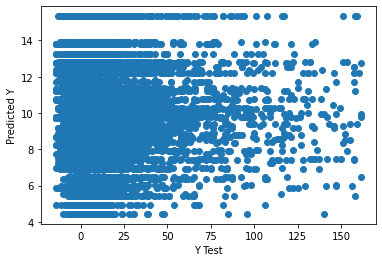

In [56]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [57]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 11.286734445007417
MSE: 351.1417068828333
RMSE: 18.738775490485853


### Residuales

C:\Users\TDC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


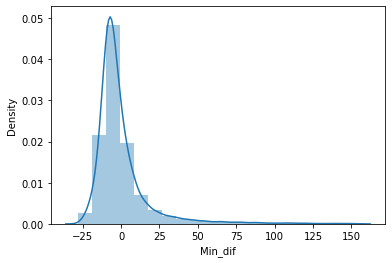

In [58]:
sns.distplot((y_test-predictions),bins=20);

In [59]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
temporada_alta,2.089672
TIPOVUELO_d,2.812857
per_manana,-1.438646
MES,0.506556


## Decision Tree y Random Forest

In [60]:
cat1=['OPERA']
cat2=['TIPOVUELO']
cat3=['SIGLADES']
cat4=['periodo_dia']
cat5=['MES']
cat6=['DIANOM']
data1=pd.get_dummies(data, columns=cat1,drop_first=True)
data2=pd.get_dummies(data1, columns=cat2,drop_first=True)                    
data3=pd.get_dummies(data2, columns=cat3,drop_first=True)                   
data4=pd.get_dummies(data3, columns=cat4,drop_first=True)                    
data5=pd.get_dummies(data4, columns=cat5,drop_first=True)                    
final_data=pd.get_dummies(data5, columns=cat6,drop_first=True)                    
                 

In [61]:
final_data.head()

,Fecha-I,Fecha-O,DIA,AÑO,temporada_alta,Min_dif,atraso_15,per_manana,TIPOVUELO_d,OPERA_Aeromexico,...,MES_9,MES_10,MES_11,MES_12,DIANOM_Jueves,DIANOM_Lunes,DIANOM_Martes,DIANOM_Miercoles,DIANOM_Sabado,DIANOM_Viernes
0,2017-01-01 23:30:00,2017-01-01 23:33:00,1,2017,1,3.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-02 23:30:00,2017-01-02 23:39:00,2,2017,1,9.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2017-01-03 23:30:00,2017-01-03 23:39:00,3,2017,1,9.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,2017-01-04 23:30:00,2017-01-04 23:33:00,4,2017,1,3.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2017-01-05 23:30:00,2017-01-05 23:28:00,5,2017,1,-2.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [62]:
X = final_data.drop(['Fecha-I', 'Fecha-O','DIA', 'AÑO','Min_dif', 'atraso_15', 'per_manana', 'TIPOVUELO_d'], axis=1)
y = final_data['atraso_15']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtree = DecisionTreeClassifier()

In [65]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediccion

In [66]:
predictions = dtree.predict(X_test)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
print(confusion_matrix(y_test,predictions))

[[15611  1107]
 [ 3116   628]]


In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88     16718
           1       0.36      0.17      0.23      3744

    accuracy                           0.79     20462
   macro avg       0.60      0.55      0.56     20462
weighted avg       0.75      0.79      0.76     20462



In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier(n_estimators=600)

In [72]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

### Random Forest

In [73]:
predictions = rfc.predict(X_test)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     16718
           1       0.36      0.19      0.25      3744

    accuracy                           0.79     20462
   macro avg       0.60      0.56      0.56     20462
weighted avg       0.75      0.79      0.76     20462



In [76]:
print(confusion_matrix(y_test,predictions))

[[15472  1246]
 [ 3034   710]]


## Evaluacion de los modelos
Los modelos ocupados para predecir la probabilidad de tener un atraso de vuelos en particular fueron:
- La Regresion Logistica, que en su predictividad dejo mucho que desear, debido que no acerto, o clasifico a ningun vuelo con atraso de mas de 15 minutos, por lo que e modleo no sirve 
- La regresion lineal mo fue de gran ayuda debido a que las variables que se obtuvieron fueron solo categoricas realizando imposible tener un resultado congruente.
- Por ultimo el Decision Tree y el Random Forest fueron lo mas acertados. Ante las Metricas de evaluacion estos tuvieron un exito muy superior a los modelos anteriores.
la metrica utilizada es el recall y precision. Estas es nos muestra los porcentajes de de acierto sobre distintas bases. En el caso de la precision esta mide los totales positivosdivididos por los totales positivos y los falsos positivos, en el caso del recall son los totales positivos, divididos por el total positivo y falso negativo.
Por ultimo es bueno tener presente que se debe tomar solo en consideracion la eleccion de que se atarsa el vuelo , ante estas metricas, ya que la gran mayoria de los vuelos, no tiene retrasos.